# Transformación de Audio en Imagen de Espectrograma
---
**Configuración General del Entorno de Trabajo**

Esta sección detecta si el notebook está corriendo en un entorno COLAB o en uno LOCAL . Monta la carpeta de Google Drive si corresponde y define constantes para trabajar de forma general con cualquir script. Modificar las definiciones de las carpetas según el entorno y configuración del mismo.

In [2]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:     
    # configuración para notebook en COLAB
    DRIVE_DIR = '/content/drive/MyDrive/' # carpeta G-Drive
    MNT_DRIVE_DIR = '/content/drive/'     # carpeta donde montar G-Drive
    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/Fuentes' 
    DATOS_DIR = DRIVE_DIR + 'Datos/'      # carpeta donde se encuentran los datasets

    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount(MNT_DRIVE_DIR)
else:
    # configuración para notebook con instalación LOCAL
    
    FUENTES_DIR = './RN2022/Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR = 'D:/Internet/G-Drive/Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

**Preparación de Datos**

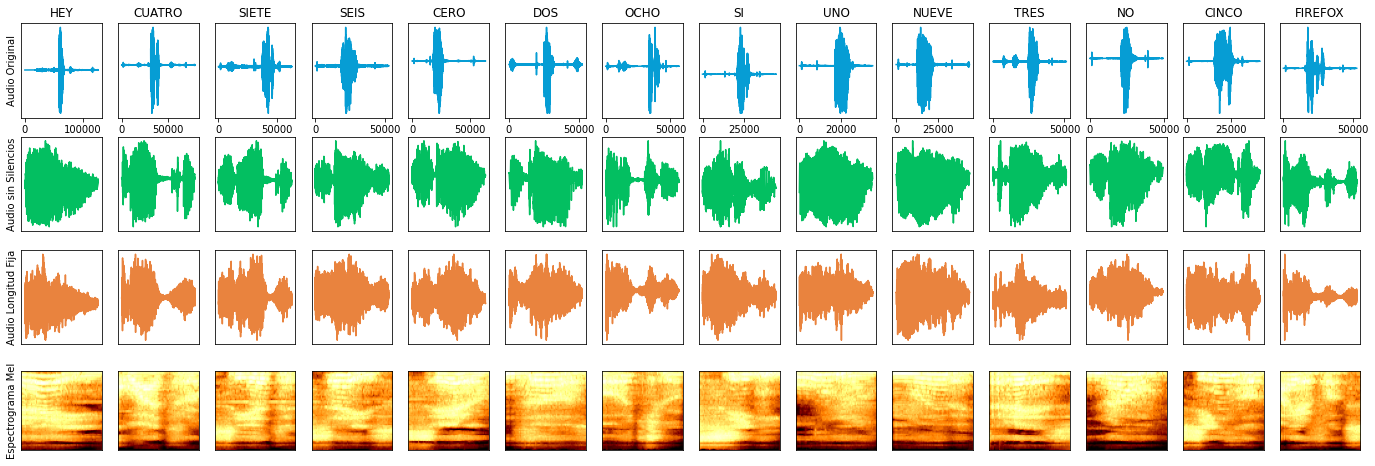

In [2]:
# Instalar los siguientes paquetes para poder correr ejecutar las funciones de este mÃ³dulo
import TransformacionesAudio as ta
#conda install librosa
#conda install ffmpeg
#conda install audioread

import librosa
import  glob
import matplotlib.pyplot as plt

def extraer_nombre_archivo(filename):
    # formato esperado :voz\\013F96_M_CERO.ogg
    idx = filename.rfind('_') # busca el "_" comenzando desde atras
  
    return filename[idx+1:-4]
    

IMG_ERROR = 'No hay imagenes para cargar. Verificar que la ruta sea correcta y que la carpeta tenga imagenes con la extension usada'
DIR_ORIG  = DATOS_DIR+'Voz/samples/*.ogg'

FILTROS_MEL  = 64    # cantidad de filtros/coeficientes MEL a calcular
TIEMPO_AUDIO = 0.75  # longitud en segundos que deberan tener todos los audios 
# tiempo mínimo de audio que debe superar un segmento considerado como NO silencio
# dentro del audio. Es un intento para recortar teclas al iniciar y terminar la grabacion
AUDIO_VALIDO_SEGS = 0.10 


archivos = glob.glob(DIR_ORIG)
assert len(archivos) > 0, IMG_ERROR 

#plt.figure()
fig, axs = plt.subplots(4, len(archivos), figsize=(24,8))

for i in range(len(archivos)):
    
    archivo = archivos[i]
    palabra = extraer_nombre_archivo(archivo)
    # carga archivo, retorna audio y frecuencia de muestreo
    audio, muestreo = librosa.load(archivo)
    
    #axs[0,i].set_xticks([]) 
    axs[0,i].set_yticks([]) 
    axs[0,i].plot(audio, color="#069DD4")
    axs[0,i].set_title(palabra)
    if i==0:
        axs[0,i].set_ylabel("Audio Original") 
        
    # recorta  "silencios" antes y despues del audio. Esto es porque los silencios
    # coinciden al comparar 2 audios, algo  que se debe evitar para mejorar la efectividad
    #audio_sin_silencios = ta.recortar_silencios(audio, muestreo, AUDIO_VALIDO_SEGS)
    audio_sin_silencios = ta.recortar_silencios(audio)

    axs[1,i].set_xticks([]) 
    axs[1,i].set_yticks([]) 
    axs[1,i].plot(audio_sin_silencios, color="#03BF61")
    if i==0:
        axs[1,i].set_ylabel("Audio sin Silencios") 
    
    # ajusta longitud del audio para que coincida con TIEMPO_AUDIO (achica o agranda).
    # El ajuste lo hace sin perder el tono
    audio_ajustado= ta.ajustar_largo_audio(audio_sin_silencios, muestreo, TIEMPO_AUDIO)
    axs[2,i].set_xticks([]) 
    axs[2,i].set_yticks([]) 
    axs[2,i].plot(audio_ajustado, color="#E9833E")
    if i==0:
        axs[2,i].set_ylabel("Audio Longitud Fija") 
        
    espectrograma_mel = ta.audio_a_espectrograma_mel(audio_ajustado, muestreo, FILTROS_MEL)
    axs[3,i].set_xticks([]) 
    axs[3,i].set_yticks([]) 
    axs[3,i].imshow(espectrograma_mel, cmap='afmhot')
    if i==0:
        axs[3,i].set_ylabel("Espectrograma Mel") 